In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from gym.envs.registration import register

In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)

env = gym.make('FrozenLake-v3')

In [6]:
# mode: 'noise', 'e-greedy'
def run(mode='noise'):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    dis = .99
    e = 1. / ((i // 100) + 1)
    num_episodes = 2000 
    r_list = []
    for i in range(num_episodes):
        state = env.reset()
        r_all = 0
        done = False

        while not done:
            if mode == 'noise':
                action = np.argmax(Q[state] + np.random.randn(1, env.action_space.n) / (i + 1))
            else:
                action = env.action_space.sample() if np.random.rand(i) < e else np.argmax(Q[state])       
            new_state, reward, done, _ = env.step(action)
            Q[state, action] = reward + dis * np.max(Q[new_state])
            r_all += reward
            state = new_state
        r_list.append(r_all)
    print(f'Success rate: {(sum(r_list) / num_episodes):.3f}')
    print('Final Q-Table Values')
    print(Q)
    plt.plot(range(len(r_list)), r_list, color='blue')
    plt.show()

Success rate: 0.928
Final Q-Table Values
[[0.         0.95099005 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.970299   0.        ]
 [0.         0.         0.9801     0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


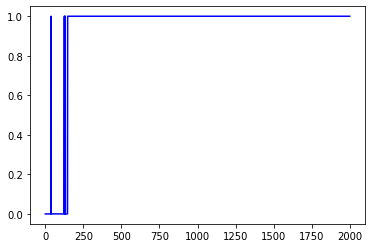

In [15]:
run()

Success rate: 0.930
Final Q-Table Values
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.99       0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


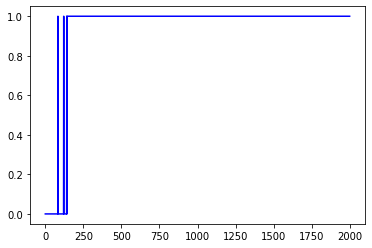

In [10]:
run(mode='e-greedy')